<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

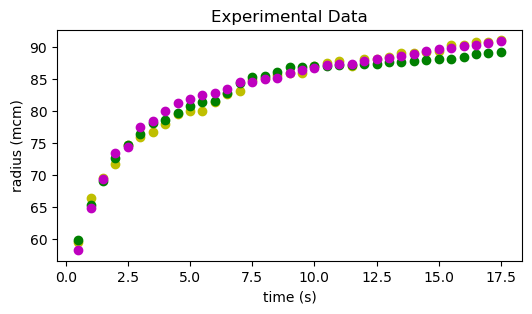

In [3]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

Don't forget to find the errors on $R$ estimated from the three experimental runs.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

In [4]:
from scipy.optimize import fsolve
# volume is in micrometer cube as radius is chosen to be in micrometer

volume = 7600
radius_datas = np.vstack([radius_data1, radius_data2, radius_data3])
mean_radius = np.mean(radius_datas, axis = 0)
errors = np.std(radius_datas, axis = 0)
guess = np.full((1, len(mean_radius)), 1)

def height_rootfinding(height, radius):
    '''
    solves the height with a non-linear equation using fsolve algorithm
    '''
    formula_1 = (3*radius**2 + height ** 2)
    formula = np.pi/6*height* formula_1 - volume
    return formula

height_data1 = fsolve(height_rootfinding, guess, args = (radius_data1))
height_data2 = fsolve(height_rootfinding, guess, args = (radius_data2))
height_data3 = fsolve(height_rootfinding, guess, args = (radius_data3))
height_data1

array([1.36581977, 1.09832664, 1.0014217 , 0.94106614, 0.86619454,
       0.8374519 , 0.82250787, 0.79441821, 0.76361046, 0.75453887,
       0.75446104, 0.72847785, 0.70914355, 0.6993922 , 0.67091953,
       0.66720036, 0.65847139, 0.65538315, 0.65416301, 0.63744236,
       0.63181687, 0.62780817, 0.63832893, 0.62354405, 0.6231591 ,
       0.61862013, 0.60968476, 0.6088946 , 0.60793154, 0.60594136,
       0.59318142, 0.59195358, 0.58741823, 0.585681  , 0.5830217 ])

In [5]:
# finding contact angle theta for each run
def contact_angle(radius, height):
    argument = (radius ** 2 - height ** 2)/ (2*radius*height)
    angles = np.pi/2 - np.arctan(argument)
    return angles

angle1 = contact_angle(radius_data1, height_data1)
angle2 = contact_angle(radius_data2, height_data2)
angle3 = contact_angle(radius_data3, height_data3)

angles = np.array([angle1, angle2, angle3])
mean_angle = np.mean(angles, axis = 0)
angle_error = np.std(angles, axis = 0)
print(mean_angle)
print(angle1)

[0.04672259 0.03441847 0.02906048 0.02530081 0.02333043 0.02149328
 0.02060063 0.01973434 0.01874678 0.01827132 0.01799398 0.0175681
 0.01695697 0.01632463 0.01579694 0.01561702 0.01537046 0.0150933
 0.01497063 0.0147114  0.01456154 0.01448006 0.01457147 0.01431295
 0.01425073 0.01414026 0.01397868 0.01389358 0.0138     0.01368998
 0.01351718 0.01341904 0.01329335 0.01317969 0.01309073]
[0.0458918  0.03309486 0.02881334 0.02624828 0.0231791  0.02203506
 0.02144791 0.02035867 0.01918599 0.01884513 0.01884221 0.0178773
 0.01717035 0.01681741 0.01580099 0.01566979 0.01536329 0.01525534
 0.01521276 0.01463324 0.01443997 0.01430276 0.01466378 0.01415729
 0.01414418 0.01398993 0.01368793 0.01366133 0.01362893 0.01356206
 0.01313595 0.01309518 0.01294498 0.01288759 0.01279992]


In [6]:
# Finding the speed of the contact line for each run by taking the difference over time
speed1 = np.diff(radius_data1)/np.diff(time)
speed2 = np.diff(radius_data2)/np.diff(time)
speed3 = np.diff(radius_data3)/np.diff(time)

speeds = np.array([speed1, speed2, speed3])
mean_speed = np.mean(speeds, axis = 0)
speed_error = np.std(speeds, axis = 0)

Let's plot these results to see what they look like:

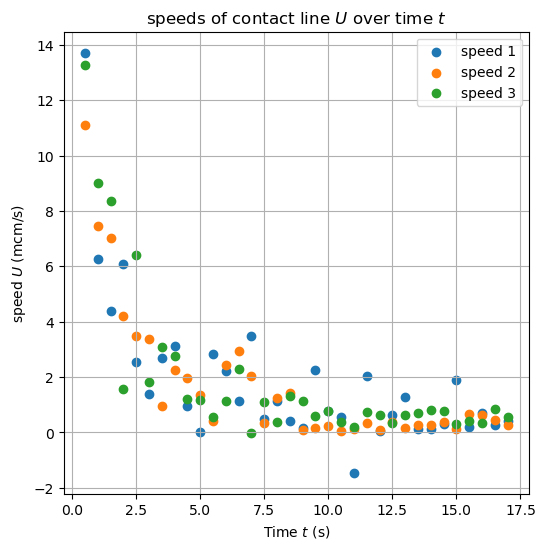

In [7]:
# Plotting the three individual runs of speed over time
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(time[:-1], speed1, marker = 'o', label = 'speed 1')
ax.scatter(time[:-1], speed2, marker = 'o', label = 'speed 2')
ax.scatter(time[:-1], speed3, marker = 'o', label = 'speed 3')
ax.set_title('speeds of contact line $U$ over time $t$')
ax.set_xlabel('Time $t$ (s)')
ax.set_ylabel('speed $U$ (mcm/s)')
ax.grid()
ax.legend()
plt.show()

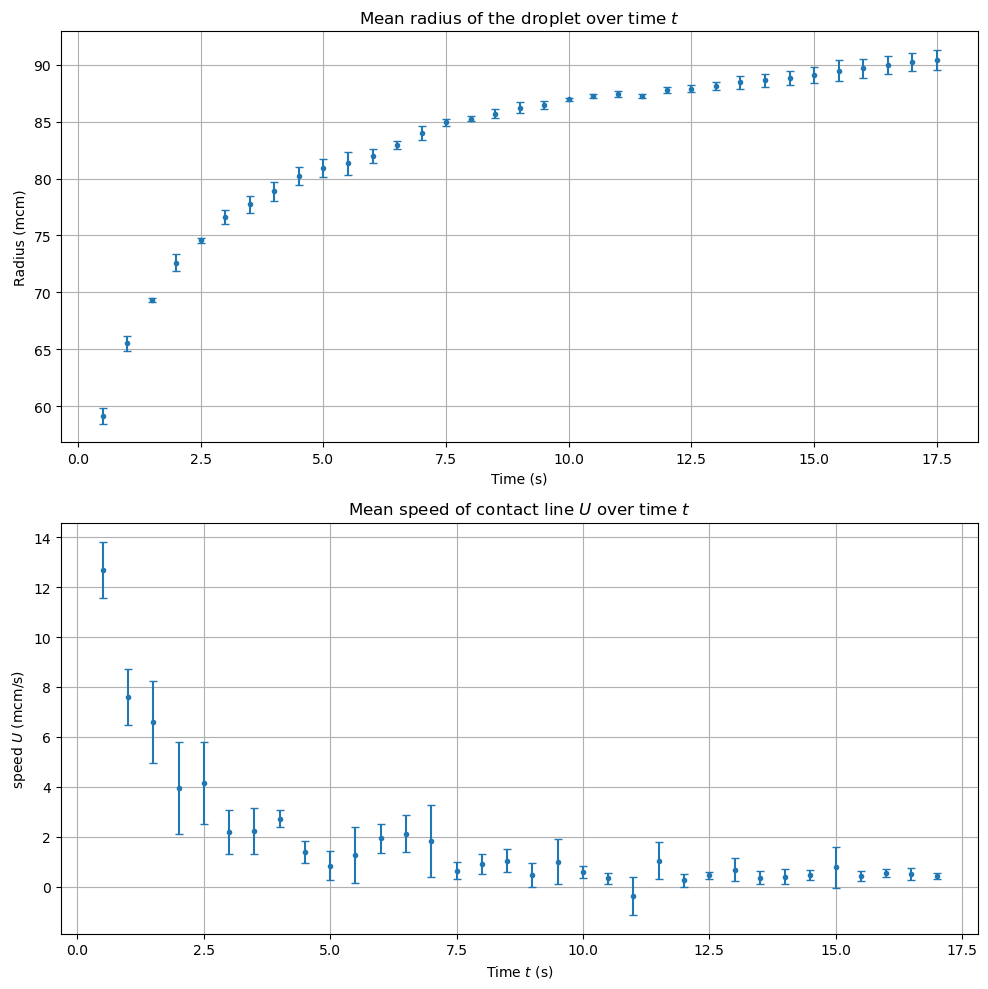

In [8]:
# plotting the mean radius of droplet over time
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(211)
ax.errorbar(time, mean_radius, yerr = errors, fmt = '.', capsize = 3)
ax.grid()
ax.set_title('Mean radius of the droplet over time $t$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Radius (mcm)')

#plotting graph for speed of contact line
speed_ax = fig.add_subplot(212)
speed_ax.errorbar(time[:-1], mean_speed, yerr = speed_error, fmt = '.', capsize = 3)
speed_ax.set_title('Mean speed of contact line $U$ over time $t$')
speed_ax.set_xlabel('Time $t$ (s)')
speed_ax.set_ylabel('speed $U$ (mcm/s)')
speed_ax.grid()
fig.tight_layout()
plt.show()

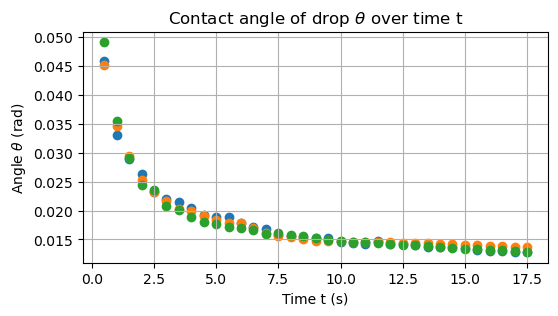

In [9]:
# Plotting the contact angle for each run
angle_fig = plt.figure()
angle_ax = angle_fig.add_subplot(111)
angle_ax.scatter(time, angle1, marker = 'o', label = 'angle 1')
angle_ax.scatter(time, angle2, marker = 'o', label = 'angle 2')
angle_ax.scatter(time, angle3, marker = 'o', label = 'angle 3')
angle_ax.grid()
angle_ax.set_title(r'Contact angle of drop $\theta$ over time t')
angle_ax.set_xlabel('Time t (s)')
angle_ax.set_ylabel(r'Angle $\theta$ (rad)')
plt.show()


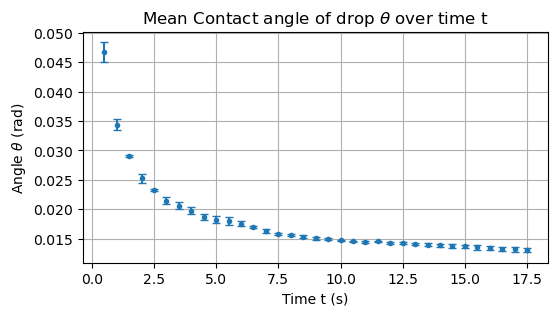

In [10]:
# plotting the mean contact angle of drop with errorbars
angle_fig = plt.figure()
angle_ax = angle_fig.add_subplot(111)
angle_ax.errorbar(time, mean_angle, yerr = angle_error, fmt = '.', capsize = 3)
angle_ax.grid()
angle_ax.set_title(r'Mean Contact angle of drop $\theta$ over time t')
angle_ax.set_xlabel('Time t (s)')
angle_ax.set_ylabel(r'Angle $\theta$ (rad)')
plt.show()


The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

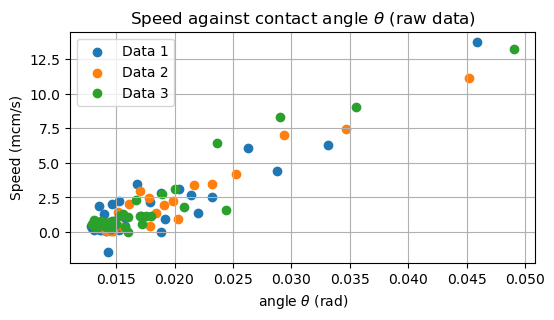

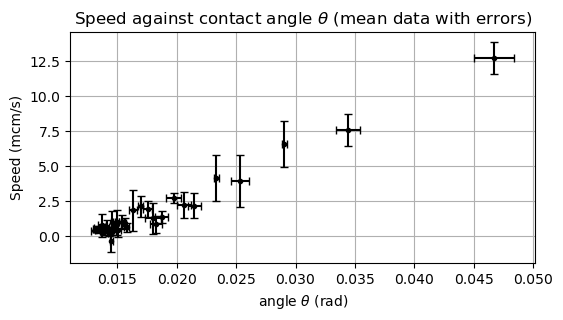

In [12]:
# Plotting raw experimental data of speed against angle for three runs as well as the mean of all data

exp_fig= plt.figure()
exp_ax = exp_fig.add_subplot(111)
exp_ax.scatter(angle1[:-1], speed1, label = 'Data 1')
exp_ax.scatter(angle2[:-1], speed2, label = 'Data 2')
exp_ax.scatter(angle3[:-1], speed3, label = 'Data 3')
exp_ax.grid()
exp_ax.set_title(r'Speed against contact angle $\theta$ (raw data)')
exp_ax.set_xlabel(r'angle $\theta$ (rad)')
exp_ax.set_ylabel('Speed (mcm/s)')
exp_ax.legend()
plt.show()


exp_fig2= plt.figure()
exp_ax2 = exp_fig2.add_subplot(111)
exp_ax2.errorbar(mean_angle[:-1], mean_speed, yerr = speed_error, xerr = angle_error[:-1], fmt = '.', 
                 capsize = 3, color = 'black')
exp_ax2.grid()
exp_ax2.set_title(r'Speed against contact angle $\theta$ (mean data with errors)')
exp_ax2.set_xlabel(r'angle $\theta$ (rad)')
exp_ax2.set_ylabel('Speed (mcm/s)')
plt.show()


![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [14]:
# for cox-Voinox law, 
mean_angle_cube = np.power(mean_angle[:-1], 3)
fit_parameters, covariance = np.polyfit(mean_angle_cube, mean_speed, 1, cov = True)
#fit gives the form of y = ax+b, and diagonal of covariance gives the variance of the parameters
fit_errors = np.sqrt(np.diag(covariance))

char_speed = fit_parameters[0]
char_speed_error = fit_errors[0]
equil_angle = np.cbrt(-fit_parameters[1]/char_speed)

# error propagation formula for angle theta_0
error_prop = np.sqrt((char_speed_error/char_speed)**2 + (fit_errors[1]/fit_parameters[1])**2)
equil_angle_error = -equil_angle/3 * error_prop

# for de Gennes law,
angle_square = mean_angle[:-1] ** 2
fit_parameters2, covariance2 = np.polyfit(angle_square, mean_speed, 1, cov = True)
char_speed2 = fit_parameters2[0]
fit_errors2 = np.sqrt(np.diag(covariance2))
char_speed2_error = fit_errors2[0]

# calculating error propagation for angle theta_0
equil_angle2 = np.sqrt(-fit_parameters2[1]/char_speed2)
error_prop2 = np.sqrt((char_speed2_error/char_speed2)**2 + (fit_errors2[1]/fit_parameters2[1])**2)
equil_angle2_error = 0.5 * equil_angle2 * error_prop2

cox_results = [char_speed, char_speed_error, equil_angle, equil_angle_error]
gennes_results = [char_speed2, char_speed2_error, equil_angle2, equil_angle2_error]

print('fit parameters for Cox-Voinox law:')
print('U_0 = {:.2e} +/- {:.0e} mcm/s'.format(cox_results[0], cox_results[1]))
print('theta_0 = {:.1e} +/- {:.0e} rad'.format(cox_results[2], cox_results[3]))
print('fit parameters for de Gennes law:')
print('U_0 = {:.1e} +/- {:.0e} mcm/s'.format(gennes_results[0], gennes_results[1]))
print('theta_0 = {:.1e} +/- {:.0e} rad'.format(gennes_results[2], gennes_results[3]))

fit parameters for Cox-Voinox law:
U_0 = 1.34e+05 +/- 9e+03 mcm/s
theta_0 = -1.6e-02 +/- 2e-03 rad
fit parameters for de Gennes law:
U_0 = 6.6e+03 +/- 3e+02 mcm/s
theta_0 = 9.6e-03 +/- 1e-03 rad


The size of the errors for each parameter value are of reasonable size, as they do not exceed the size of the parameter. The speed obtained for Cox-Voinox law is observed to be unreasonably big, as the magnitude for $U_0$ is of the order of magnitude of 5. The angle $\theta_0$ at equilibrium was also shown to be negative. This suggests that the droplet forms a meniscus, but in reality a drop should have a positive curvature when making contact with the table. As for the de Gennes law, speed $U_0$ is obtained at an order of magnitude of 3, which seems more reasonable. $\theta_0$ is appeared to be positive, which should be physically expected when the drop has landed on a surface.

Displaying the corresponding fits  

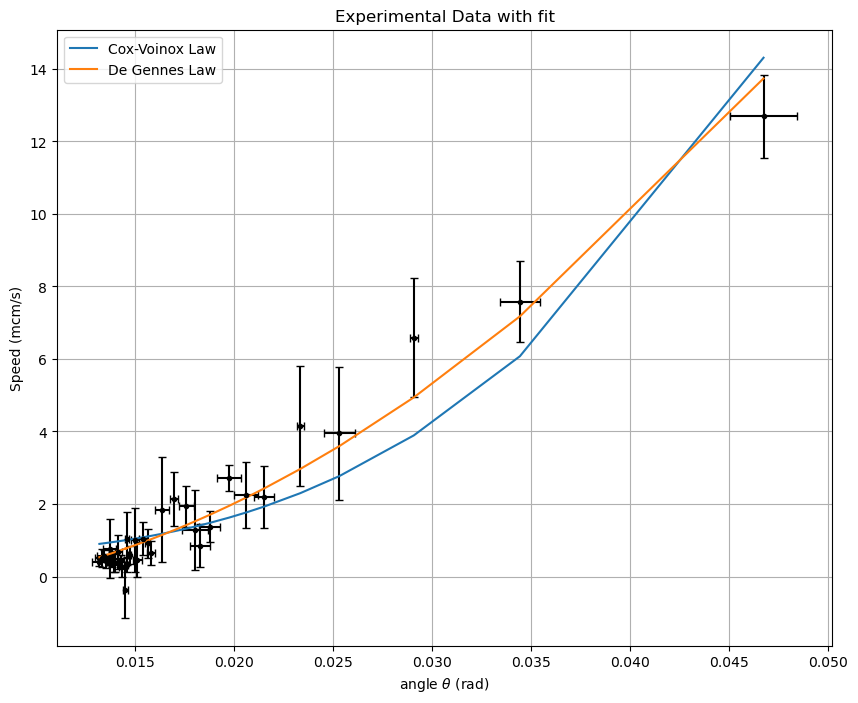

In [15]:
# calculating the expected data for each law
fitted_y = char_speed*(mean_angle_cube - equil_angle **3)
fitted_y2 = char_speed2* (angle_square - equil_angle2 **2)

# plotting out the fit
exp_fig2= plt.figure(figsize = (10,8))
exp_ax2 = exp_fig2.add_subplot(111)
exp_ax2.errorbar(mean_angle[:-1], mean_speed, yerr = speed_error, xerr = angle_error[:-1], fmt = '.', 
                 capsize = 3, color = 'black')
exp_ax2.plot(mean_angle[:-1], fitted_y, label = 'Cox-Voinox Law')
exp_ax2.plot(mean_angle[:-1], fitted_y2, label = 'De Gennes Law')
exp_ax2.grid()
exp_ax2.set_title('Experimental Data with fit')
exp_ax2.set_xlabel(r'angle $\theta$ (rad)')
exp_ax2.set_ylabel('Speed (mcm/s)')
exp_ax2.legend()
plt.show()

From the fit above, we can see that the de Gennes law line passes through more of the data points in their tolerant range than that of the cox-Voinox law. So from a graphical argument, the de Gennes law is a better fit than the Cox-Voinox law. However, a chi-square test comparison is turned to for an accurate quantitative performance.


![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots.

In [16]:
# write your code here & but also expand the description above
def chi_square(expectations, observations, errors):
    '''
    calculates the chi-square value from the expectations and observation values
    
    Parameters
    ==========
    expectations: np.ndarray (expected value from fit)
    observations: np.ndarray (actual data value)
    errors: np.ndarray (errors of the data in the experiment)
    
    Return
    ======
    chi_square: float
    reduced_chi: float
    '''
    chi_square = np.sum((np.abs(expectations - observations)/errors)**2)
    dof = len(expectations) - 2
    reduced_chi = chi_square/ dof
    return chi_square, reduced_chi


cox_chi_result = chi_square(fitted_y, mean_speed, speed_error)
gennes_chi_result = chi_square(fitted_y2, mean_speed, speed_error)

cox_redchi = cox_chi_result[1]
gen_redchi = gennes_chi_result[1]
print('The reduced chi square for fit of Cox-Voinox law on our data is {0:.2f}\nThe reduced chi square for fit of de Gennes law on our data is {1:.2f}'.format(cox_redchi, gen_redchi))

The reduced chi square for fit of Cox-Voinox law on our data is 3.49
The reduced chi square for fit of de Gennes law on our data is 1.07


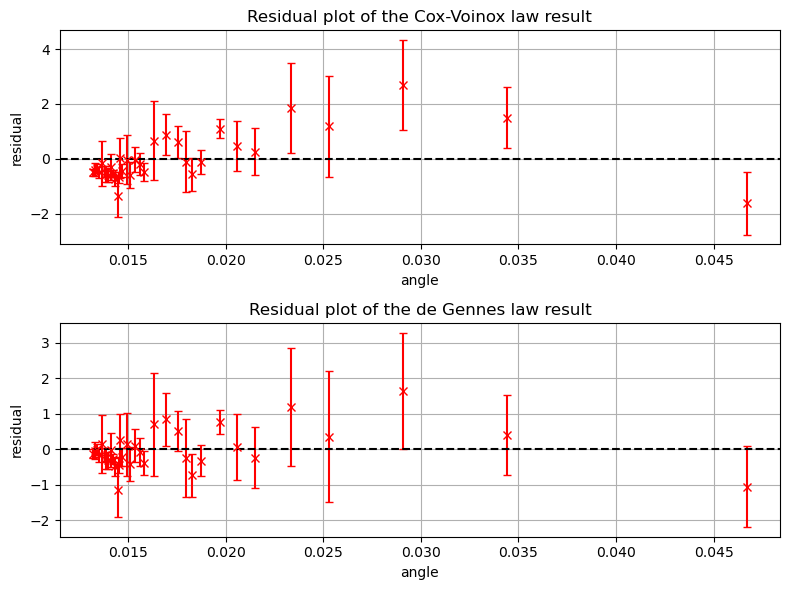

In [17]:
# calculating the residuals
cox_residuals = mean_speed - fitted_y
gennes_residuals = mean_speed - fitted_y2

residual_fig = plt.figure(figsize = (8,6))
res_ax1 = residual_fig.add_subplot(211)
res_ax1.errorbar(mean_angle[:-1], cox_residuals, yerr = speed_error, fmt = 'x', 
                 capsize = 3, color = 'red')
res_ax1.axhline(y = 0, linestyle = '--', color = 'black')
res_ax1.set_title('Residual plot of the Cox-Voinox law result')
res_ax1.set_xlabel('angle')
res_ax1.set_ylabel('residual')
res_ax1.grid()

res_ax2 = residual_fig.add_subplot(212)
res_ax2.errorbar(mean_angle[:-1], gennes_residuals, yerr = speed_error, fmt = 'x', 
                 capsize = 3, color = 'red')
res_ax2.axhline(y = 0, linestyle = '--', color = 'black')
res_ax2.set_title('Residual plot of the de Gennes law result')
res_ax2.set_xlabel('angle')
res_ax2.set_ylabel('residual')
res_ax2.grid()
plt.tight_layout()
plt.show()


From the above residual plots, we can see the residual points in the residual plot for de Gennes Law is closer to the zero line than the one for Cox-Voinox law. More error bars were overlapping with the zero line. In addition, the reduced chi square obtained for the de Gennes Law is smaller and closer to 1, which is a characteristic for best fit of data. Comparing with the other law, the reduced chi square is higher by 2, suggesting the fit of the result is not satisfactory and that the difference with the expected values were big. For all these reasons, the de Gennes law is a better fit.

![](./img/bee.png)
## Drop Spreading Law Is de Gennes Law

The results of the chi-squared analysis suggest that the de Gennes law is a better fit for the behaviour of the spreading drop because the de Gennes law had a better statistical and graphical result. Firstly, from the chi-square test, it is blatantly clear that the reduced chi-square was an extraodinarily good value. It is very close to 1, which proves that the fit matches our data in accordance with its errors. Secondly, from graphical viewpoints, the de Gennes law passes through most of the data points through its error range than the other law. This is further supported by its residual plot. This can also be shown by expected error $\sigma_{fit}$ calculated by the following formula:

In [18]:
# write your code here & but also expand the description above
def cal_expected_fiterr(expectations, observations):
    '''
    calculates the expected error bar size from our chi square fit result
    
    Parameters
    ==========
    expectations: np.ndarray (expected results from the formula of fit)
    observations: np.narray (actual data)
    
    return
    ======
    expected_fiterr: float
    '''
    dof = len(expectations) - 2
    fit_sum = np.sum((expectations - observations)**2)
    expected_fiterr = np.sqrt(fit_sum/dof)
    return expected_fiterr



cox_expected_err_size = cal_expected_fiterr(fitted_y, mean_speed)
gennes_expected_err_size = cal_expected_fiterr(fitted_y2, mean_speed)


print('expected error on data from Cox-voinox law: {:.2f}'.format(cox_expected_err_size))
print('expected error on data from de Gennes law: {:.2f}'.format(gennes_expected_err_size))

print('average size of error from data: {:.2f}'.format(np.mean(speed_error)))

expected error on data from Cox-voinox law: 0.90
expected error on data from de Gennes law: 0.58
average size of error from data: 0.65


In the cell above, we can see the expected error in de Gennes law is the closest to average error of the actual data. This adds credibility to its fit relation. As for the Cox-voinox law, the expected error is much larger than the average size, suggesting the wrong relationship is used. In addition, the values given by the de Gennes law seem to be more physically reasonable. $\theta_0$ is a positive value and $U_0$ has a reasonable order of magnitude. The error on the fits were also scaled sensibly. Therefore, for all of these reasons above, the de Gennes law should be the correct spreading law for the ink. 

![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 